In [1]:
import numpy as np
import torch
import os
import skimage.io as io
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch import from_numpy as from_numpy
from matplotlib.colors import ListedColormap
from active_learning_with_exact09 import process_images
from func.model_arch2 import SegAirwayModel
import pickle

/home/wangc/anaconda3/envs/test1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

Precrop_dataset_for_train_path = "/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091"
Precrop_dataset_for_train_raw_path = Precrop_dataset_for_train_path+"/image"
Precrop_dataset_for_train_label_path = Precrop_dataset_for_train_path+"/label"

raw_case_name_list = os.listdir(Precrop_dataset_for_train_raw_path)

In [3]:


device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
model=SegAirwayModel(in_channels=1, out_channels=2)
model.to(device)
load_pkl='/home/wangc/now/NaviAirway/checkpoint/abc_checkpoint_sample_org_33.pkl'
checkpoint = torch.load(load_pkl)
model.load_state_dict(checkpoint['model_state_dict'])

# embeddings_list, embeddings_dict=process_images(Precrop_dataset_for_train_path,
#                                                 raw_case_name_list, N=8832,model=model, device=device,
#                                                 only_positive=False)

<All keys matched successfully>

In [4]:
subset_no_0304=[]
for crop in raw_case_name_list:
    if crop[:14] != 'EXACT09_CASE03' and crop[:14] != 'EXACT09_CASE04':
        subset_no_0304.append(crop) 

In [33]:
embeddings_list, embeddings_dict=process_images(Precrop_dataset_for_train_path,
                                                subset_no_0304, N=8832,model=model, device=device,
                                                only_positive=True)

this is 1
this is 2
this is 3
this is 4
this is 5
this is 6
this is 7
this is 8
this is 9
this is 10
this is 11
this is 12
this is 13
this is 14
this is 15
this is 16
this is 17
this is 18
this is 19
this is 20
this is 21
this is 22
this is 23
this is 24
this is 25
this is 26
this is 27
this is 28
this is 29
this is 30
this is 31
this is 32
this is 33
this is 34
this is 35
this is 36
this is 37
this is 38
this is 39
this is 40
this is 41
this is 42
this is 43
this is 44
this is 45
this is 46
this is 47
this is 48
this is 49
this is 50
this is 51
this is 52
this is 53
this is 54
this is 55
this is 56
this is 57
this is 58
this is 59
this is 60
this is 61
this is 62
this is 63
this is 64
this is 65
this is 66
this is 67
this is 68
this is 69
this is 70
this is 71
this is 72
this is 73
this is 74
this is 75
this is 76
this is 77
this is 78
this is 79
this is 80
this is 81
this is 82
this is 83
this is 84
this is 85
this is 86
this is 87
this is 88
this is 89
this is 90
this is 91
this is 

In [17]:
N=len(embeddings_list)
N

7744

In [34]:
# 指定保存文件的完整路径
import pickle
file_path = '/home/wangc/now/NaviAirway/saved_var/subset_no_0304_postive.pkl'

# 确保文件夹存在，如果不存在则创建它
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# 保存到文件
with open(file_path, 'wb') as file:
    data_to_save = {'embeddings_list': embeddings_list, 'embeddings_dict': embeddings_dict}
    pickle.dump(data_to_save, file)


In [4]:
# 从文件加载
# file_path = '/home/wangc/now/NaviAirway/saved_var/subset_no_0304_postive.pkl'
file_path='/home/wangc/now/NaviAirway/saved_var/only_positive_8832_embeddings_data.pkl'
# file_path = '/home/wangc/now/NaviAirway/saved_var/num_8832_embeddings_data.pkl'
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)
    embeddings_list = loaded_data['embeddings_list']
    embeddings_dict = loaded_data['embeddings_dict']

In [5]:
stacked_embeddings_numpy = np.stack(embeddings_list, axis=0)

In [6]:
def query_embedding(embeddings_dict, case_number, patch_number):
    if case_number < 10:
        case_number='0'+str(case_number)
    if patch_number < 10:
        patch_number='0'+str(patch_number)
    query = 'EXACT09_CASE'+str(case_number)+'_'+str(patch_number)+'.nii.gz'
    # print(query)
    return embeddings_dict[query],query


# query_emb1= query_embedding(embeddings_dict,2, 347).flatten()
# query_emb2= query_embedding(embeddings_dict,2,467).flatten()
# query_emb3= query_embedding(embeddings_dict,11, 165).flatten()
# query_emb2.shape

In [7]:
#第一组
input_cu_pairs = [(7, 403),(15, 347),(1, 539),(15, 355),(17, 347),(1, 411),(9, 403),(18, 419),(12, 227),(12, 218)]
input_xi_pairs= [(11, 165),(16, 228),(11, 153),(10, 153),(19, 89),(19, 90),(8, 154),(14, 281),(14, 285),(9, 154)]
input_wu_pairs= [(13, 46),(13, 166),(12, 151),(8, 277),(7, 143),(12, 169),(10, 168),(8, 160),(10, 167),(20, 278)]
triple_pairs_dict1={'cu':input_cu_pairs,'xi':input_xi_pairs,'wu':input_wu_pairs}



In [39]:
input_cu_pairs = [(17, 283),(17, 291),(1, 419),(1, 539),(18, 411),(18, 347),(2, 347),(17, 418),(17, 346),(2, 411)]
input_xi_pairs= [(19, 103),(19, 86),(1, 289),(1, 290),(2, 86),(2, 87),(2, 90),(2, 93),(1, 229),(2, 93)]
input_wu_pairs= [(13, 46),(13, 166),(12, 151),(8, 277),(7, 143),(12, 169),(4, 280),(8, 160),(10, 167),(20, 278)]
triple_pairs_dict2={'cu':input_cu_pairs,'xi':input_xi_pairs,'wu':input_wu_pairs}


In [8]:
# 生成查询并存储在列表中
query_list1 = []
query_list2 = []
query_list3 = []
temp_dict=triple_pairs_dict1
input_cu_pairs = temp_dict['cu']
input_xi_pairs= temp_dict['xi']
input_wu_pairs= temp_dict['wu']
emb_vector,_=query_embedding(embeddings_dict, input_xi_pairs[1][0], input_xi_pairs[1][1])
emb_vectors1=np.zeros((10, *emb_vector.shape))
emb_vectors2=np.zeros((10, *emb_vector.shape))
emb_vectors3=np.zeros((10, *emb_vector.shape))
for i in range(10):
    emb_vector1, query1 = query_embedding(embeddings_dict, input_cu_pairs[i][0], input_cu_pairs[i][1])
    emb_vectors1[i,:]=emb_vector1
    query_list1.append(query1)
    emb_vector2, query2 = query_embedding(embeddings_dict, input_xi_pairs[i][0], input_xi_pairs[i][1])
    emb_vectors2[i,:]=emb_vector2
    query_list2.append(query2)
    # emb_vector3, query3 = query_embedding(embeddings_dict, input_wu_pairs[i][0], input_wu_pairs[i][1])
    # emb_vectors3[i,:]=emb_vector3
    # query_list3.append(query3)


In [38]:
from active_learning_with_exact09 import show_all_2d_img_with_labels
from matplotlib import gridspec
# label_path=Precrop_dataset_for_train_label_path

show_all_2d_img_with_labels(Precrop_dataset_for_train_raw_path,
                            '/home/wangc/now/temp1',
                            label_path='/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091/label',
                            raw_img_list=query_list1)
query_list1

['EXACT09_CASE17_283.nii.gz',
 'EXACT09_CASE17_291.nii.gz',
 'EXACT09_CASE01_419.nii.gz',
 'EXACT09_CASE01_539.nii.gz',
 'EXACT09_CASE18_411.nii.gz',
 'EXACT09_CASE18_347.nii.gz',
 'EXACT09_CASE02_347.nii.gz',
 'EXACT09_CASE17_418.nii.gz',
 'EXACT09_CASE17_346.nii.gz',
 'EXACT09_CASE01_346.nii.gz']

In [9]:
def cul_trinity(emb_vectors,emb_vectors1=emb_vectors1,emb_vectors2=emb_vectors2,emb_vectors3=emb_vectors3):
    similarity1 = similarity_sum(emb_vectors, emb_vectors1)
    similarity2 = similarity_sum(emb_vectors, emb_vectors2)
    similarity3 = similarity_sum(emb_vectors, emb_vectors3)
    return similarity1,similarity2,similarity3

similarity1,similarity2,similarity3=cul_trinity(class0_mat,emb_vectors1=emb_vectors1,emb_vectors2=emb_vectors2,emb_vectors3=emb_vectors3)
similarity1,similarity2,similarity3

In [ ]:
import numpy as np

def get_mv_and_cm(emb_vectors):
    # mv: Mean Vector, cm: Covariation Matrix
    vector_num = emb_vectors.shape[0]
    # 初始化协方差矩阵
    covariation_matrix = np.zeros((vector_num, vector_num))
    # 将向量展开为二维数组 (vector_num, feature_dim)
    vectors = emb_vectors.reshape(vector_num, -1)
    # 计算均值向量
    mean_vector = np.mean(vectors, axis=0)
    # 中心化向量
    centered_vectors = vectors - mean_vector
    
    # 计算协方差矩阵
    for i in range(vector_num):
        for j in range(vector_num):
            covariation_matrix[i, j] = np.dot(centered_vectors[i], centered_vectors[j]) / (vector_num - 1)
    
    return mean_vector, covariation_matrix



# def get_mahalanobis_distance(vector,mean_vector,covariation_matrix):
#     vector=vector.flatten()
#     temp=vector-mean_vector


In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import io
from matplotlib import gridspec

def cul_background(label_path,slice_index=None):
    label_img_list = os.listdir(label_path)
    count=0
    i=0
    for name in label_img_list:
        i+=1
        label_img_addr = os.path.join(label_path, name)  
        label_img = io.imread(label_img_addr, plugin='simpleitk')
        if slice_index is None:
            if 1 not in label_img:
                count+=1
        else:
            if 1 not in label_img[slice_index, :, :]:
                count+=1
    return count/i

        

In [9]:
emb_vectors1_mean=emb_vectors1.mean(axis=0)
emb_vectors2_mean=emb_vectors2.mean(axis=0)
emb_vectors3_mean=emb_vectors3.mean(axis=0)
emb_vectors1_mean.shape

(1, 256, 4, 16, 16)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches  # Add this import statement


# center_samples = np.concatenate([emb_vectors1_mean, emb_vectors2_mean, emb_vectors3_mean], axis=0)
center_samples = np.concatenate([emb_vectors1_mean, emb_vectors2_mean], axis=0)
# 要聚类的数据 stacked_embeddings_numpy 的形状
data_shape = stacked_embeddings_numpy.shape

X_t = stacked_embeddings_numpy.reshape(data_shape[0], -1)

# 预设3个样本中心
initial_centers = center_samples.reshape(2, -1)

# 创建 K 均值聚类模型并指定初始中心
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1, random_state=0)
# kmeans = KMeans(n_clusters=2, random_state=0)
# 执行聚类
kmeans.fit(X_t)

# 获取聚类标签
cluster_labels = kmeans.labels_

# 将聚类结果添加到 X_t 中作为最后一列
X_t_with_labels = np.column_stack((X_t, cluster_labels.reshape(-1, 1)))

N=X_t.shape[0]
# 使用 perplexity 为 50 的 t-SNE 进行嵌入
tsne = TSNE(n_components=2, perplexity=70)
X_embedded_2d = tsne.fit_transform(X_t_with_labels)
embedding_dict = {raw_case_name_list[i]: X_embedded_2d[i] for i in range(N)}


# 使用 t-SNE 进行降维
threshold_dim1 = 2000  # 调整阈值
threshold_dim2 = 2000  # 调整阈值

# 筛选出维度值在一定范围内的数据
filtered_indices = np.where((abs(X_embedded_2d[:, 0]) < threshold_dim1) & (abs(X_embedded_2d[:, 1]) < threshold_dim2))[0]

# 筛选出符合阈值的数据
filtered_embeddings = X_embedded_2d[filtered_indices]


# 绘制二维散点图，只绘制符合阈值的数据
# 可视化二维嵌入并根据聚类标签着色
# colors = list(mcolors.TABLEAU_COLORS.values())
# custom_cmap = mcolors.ListedColormap(colors)


unique_labels = np.unique(cluster_labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
colors = [cmap(i) for i in range(len(unique_labels))]

query1_points = [True if name in query_list1 else False for name in embeddings_dict.keys()]
query2_points = [True if name in query_list2 else False for name in embeddings_dict.keys()]
query3_points = [True if name in query_list3 else False for name in embeddings_dict.keys()]
# 使用 ListedColormap 为不同的聚类簇指定颜色

custom_cmap = ListedColormap(colors)
# 创建图例标签
legend_labels = [f'class{label}' for label in np.unique(cluster_labels)]

# 创建图例句柄
legend_handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(unique_labels))]

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(filtered_embeddings[:, 0], filtered_embeddings[:, 1], c=cluster_labels[filtered_indices], cmap=custom_cmap)
plt.title("t-SNE 2D Embedding with Cluster Coloring (Perplexity=70)")

m1=0
m2=0
# 添加大黑点和标记
for i in range(len(filtered_embeddings)):
    if query1_points[filtered_indices[i]] is True:
        m1+=1
        plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='red', s=150, marker='o', label='query_list1') 
    if query2_points[filtered_indices[i]] is True:
        m2+=1
        plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='pink', s=150, marker='o', label='query_list2') 
    # if query3_points[filtered_indices[i]] is True:
    #     plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='orange', s=150, marker='o', label='query_list3')  


# 添加图例
plt.legend(handles=legend_handles, loc='upper right')
plt.show()


In [36]:
X_embedded_2d.shape

(2441, 2)

In [ ]:
emb_vectors1.shape
emb_vectors1[0].shape
type(kmeans.labels_)

numpy.ndarray

In [10]:
#类KNN方式1 进行聚类
# 1. 先给出   A 10 样本:a1,a2,...,a10 对应1 
#             B 10 样本:b1,b2,...,b10 对应2
#             C 10 样本:c1,c2,...,c10 对应3
# 2. 对于A中点ai,计算ai的一个邻域内的点:
#     (1)根据距离函数和半径d，得到ai一个圆内的坐标，
#     (2)将Data中坐标在其中的点找出来，得到m1,m2,...,mn
# 3. 将所有mi的标签设为1
# 4. 同理对B、C的点做 2,3
def assign_labels_within_radius(data, labeled_dict, radius):
    # 初始化一个数组用于存储分配标签后的结果
    labels = np.full(len(data), -1, dtype=int)

    for label,value in labeled_dict.items():
        for i in range(value.shape[0]):
            point = emb_vectors1[i].reshape(1,-1)
            # 计算点point的邻域内的点
            neighbors_indices = [j for j in range(len(data.shape[0])) if np.linalg.norm(point - data[j]) <= radius]
            print(point - data[j])
        # 将邻域内的点的标签设为与当前点相同的标签
            for neighbor_index in neighbors_indices:
                labels[neighbor_index] = label

    return labels


In [18]:


#类KNN方式2 进行聚类
# 1. 先给出   A 10 样本:a1,a2,...,a10 对应1 
#             B 10 样本:b1,b2,...,b10 对应2
#             C 10 样本:c1,c2,...,c10 对应3

# 2. 对于data中任何一个点p
    # 计算 和A10个点距离da1,da2,...,da10 DA
    # db1,db2,...,db10 DB
    # dc1,dc2,...,dc10 DC 
    # 取最小值所在的类作为p的类




import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches  # Add this import statement
def cosine_similarity(tensor1, tensor2):
    flat_tensor1 = tensor1.flatten()
    flat_tensor2 = tensor2.flatten()
    
    dot_product = np.dot(flat_tensor1, flat_tensor2)
    norm_flat_tensor1 = np.linalg.norm(flat_tensor1)
    norm_flat_tensor2 = np.linalg.norm(flat_tensor2)
    
    similarity = dot_product / (norm_flat_tensor1 * norm_flat_tensor2)
    return similarity
def cosine_distance(tensor1, tensor2):
    flat_tensor1 = tensor1.flatten()
    flat_tensor2 = tensor2.flatten()
    
    dot_product = np.dot(flat_tensor1, flat_tensor2)
    norm_flat_tensor1 = np.linalg.norm(flat_tensor1)
    norm_flat_tensor2 = np.linalg.norm(flat_tensor2)
    
    similarity = dot_product / (norm_flat_tensor1 * norm_flat_tensor2)
    dist=1-similarity
    return dist
def custom_euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
def assign_labels_within_radius(data, labeled_dict,distance_func=custom_euclidean_distance):
    # 初始化一个数组用于存储分配标签后的结果

    labels = np.full(len(data),-1, dtype=int)
    distance_statistics=[]
    for i in range(data.shape[0]):
        dis={}
        pre_distance = float('inf')
        for label,points in labeled_dict.items():
            points_reshape=points.reshape(points.shape[0],-1)
            distance_sum=0
            for point in points_reshape:
                distance_sum+=distance_func(point,data[i])
            if distance_sum<pre_distance:
                labels[i]=label 
            print(distance_sum)
            dis[label]=distance_sum


            pre_distance=distance_sum
        distance_statistics.append(dis)
        print(f'this is {labels[i]},we are doing {i/data.shape[0]*100:.2f}%')
    return labels,distance_statistics




7.736063918473514
8.37717854224371
this is 0,we are doing 0.00%
7.803806771401612
7.792814092562772
this is 1,we are doing 0.04%
7.9845866752819425
7.020057968630429
this is 1,we are doing 0.08%
7.939387833126906
8.056843983661594
this is 0,we are doing 0.12%
7.212359006353556
8.045716566574296
this is 0,we are doing 0.16%
7.431676083459909
8.140376451846667
this is 0,we are doing 0.20%
7.737575078123572
7.980710272753007
this is 0,we are doing 0.25%
8.056432345769766
7.386972846332453
this is 1,we are doing 0.29%
8.260576664243054
7.595453574920774
this is 1,we are doing 0.33%
7.9194692168356955
7.709402776648005
this is 1,we are doing 0.37%
7.624686319438867
6.7672510113508295
this is 1,we are doing 0.41%
8.320221457044731
6.940754954233354
this is 1,we are doing 0.45%
6.664059159034684
8.186602147527795
this is 0,we are doing 0.49%
7.784073957046138
7.659898319555128
this is 1,we are doing 0.53%
7.968993124951888
7.46636713027835
this is 1,we are doing 0.57%
8.070087024498541
7.4154

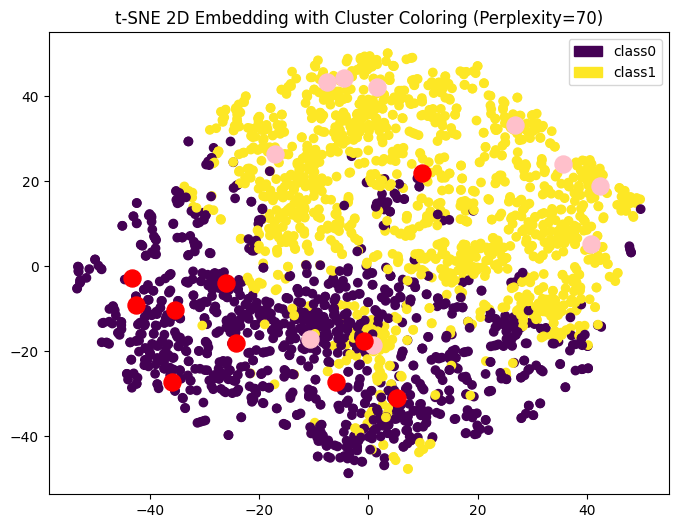

In [20]:
# labeled_dict={1:emb_vectors1,2:emb_vectors2,3:emb_vectors3}
#距离越大，应该离得越远
labeled_dict={0:emb_vectors1,1:emb_vectors2}

# 获取聚类标签
X_t=stacked_embeddings_numpy.reshape(stacked_embeddings_numpy.shape[0],-1)

cluster_labels,distance_statistics = assign_labels_within_radius(X_t, labeled_dict,distance_func=cosine_distance)


X_t_with_labels = np.column_stack((X_t, cluster_labels.reshape(-1, 1)))

N=X_t.shape[0]
# 使用 perplexity 为 50 的 t-SNE 进行嵌入
tsne = TSNE(n_components=2, perplexity=70)
X_embedded_2d = tsne.fit_transform(X_t_with_labels)
embedding_dict = {raw_case_name_list[i]: X_embedded_2d[i] for i in range(N)}

# 使用 t-SNE 进行降维
threshold_dim1 = 2000  # 调整阈值
threshold_dim2 = 2000  # 调整阈值

# 筛选出维度值在一定范围内的数据
filtered_indices = np.where((abs(X_embedded_2d[:, 0]) < threshold_dim1) & (abs(X_embedded_2d[:, 1]) < threshold_dim2))[0]

# 筛选出符合阈值的数据
filtered_embeddings = X_embedded_2d[filtered_indices]


# 绘制二维散点图，只绘制符合阈值的数据
# 可视化二维嵌入并根据聚类标签着色
# colors = list(mcolors.TABLEAU_COLORS.values())
# custom_cmap = mcolors.ListedColormap(colors)


unique_labels = np.unique(cluster_labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
colors = [cmap(i) for i in range(len(unique_labels))]

query1_points = [True if name in query_list1 else False for name in embeddings_dict.keys()]
query2_points = [True if name in query_list2 else False for name in embeddings_dict.keys()]
query3_points = [True if name in query_list3 else False for name in embeddings_dict.keys()]
# 使用 ListedColormap 为不同的聚类簇指定颜色

custom_cmap = ListedColormap(colors)
# 创建图例标签
legend_labels = [f'class{label}' for label in np.unique(cluster_labels)]

# 创建图例句柄
legend_handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(unique_labels))]

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(filtered_embeddings[:, 0], filtered_embeddings[:, 1], c=cluster_labels[filtered_indices], cmap=custom_cmap)
plt.title("t-SNE 2D Embedding with Cluster Coloring (Perplexity=70)")

m1=0
m2=0

for i in range(len(filtered_embeddings)):
    if query1_points[filtered_indices[i]] is True:
        m1+=1
        plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='red', s=150, marker='o', label='query_list1') 
    if query2_points[filtered_indices[i]] is True:
        m2+=1
        plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='pink', s=150, marker='o', label='query_list2') 
    # if query3_points[filtered_indices[i]] is True:
    #     plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='orange', s=150, marker='o', label='query_list3')  


# 添加图例
plt.legend(handles=legend_handles, loc='upper right')
plt.show()


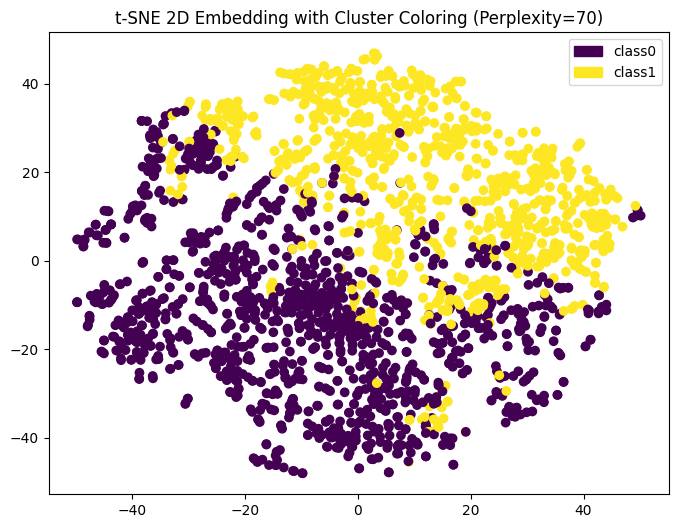

In [12]:
unique_labels = np.unique(cluster_labels)
cmap = plt.get_cmap('viridis', len(unique_labels))
colors = [cmap(i) for i in range(len(unique_labels))]

query1_points = [True if name in query_list1 else False for name in embeddings_dict.keys()]
query2_points = [True if name in query_list2 else False for name in embeddings_dict.keys()]
query3_points = [True if name in query_list3 else False for name in embeddings_dict.keys()]
# 使用 ListedColormap 为不同的聚类簇指定颜色

custom_cmap = ListedColormap(colors)
# 创建图例标签
legend_labels = [f'class{label}' for label in np.unique(cluster_labels)]

# 创建图例句柄
legend_handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(unique_labels))]

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(filtered_embeddings[:, 0], filtered_embeddings[:, 1], c=cluster_labels[filtered_indices], cmap=custom_cmap)
plt.title("t-SNE 2D Embedding with Cluster Coloring (Perplexity=70)")

m1=0
m2=0

# for i in range(len(filtered_embeddings)):
#     if query1_points[filtered_indices[i]] is True:
#         m1+=1
#         plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='red', s=150, marker='o', label='query_list1') 
#     if query2_points[filtered_indices[i]] is True:
#         m2+=1
#         plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='pink', s=150, marker='o', label='query_list2') 
#     # if query3_points[filtered_indices[i]] is True:
#     #     plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='orange', s=150, marker='o', label='query_list3')  


# 添加图例
plt.legend(handles=legend_handles, loc='upper right')
plt.show()

In [ ]:
dis_all=[]
for i in distance_statistics:
    dis_all.append(i[0]+i[1])
dis_all

In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.patches as mpatches  # Add this import statement


# # center_samples = np.concatenate([emb_vectors1_mean, emb_vectors2_mean, emb_vectors3_mean], axis=0)
# center_samples = np.concatenate([emb_vectors1_mean, emb_vectors2_mean], axis=0)
# # 要聚类的数据 stacked_embeddings_numpy 的形状
# data_shape = stacked_embeddings_numpy.shape

# X_t = stacked_embeddings_numpy.reshape(data_shape[0], -1)

# # 预设3个样本中心
# initial_centers = center_samples.reshape(2, -1)

# # 创建 K 均值聚类模型并指定初始中心
# kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1, random_state=0)

# # 执行聚类
# kmeans.fit(X_t)

# # 获取聚类标签
# cluster_labels = kmeans.labels_

# # 将聚类结果添加到 X_t 中作为最后一列
# X_t_with_labels = np.column_stack((X_t, cluster_labels.reshape(-1, 1)))

# N=min(4000,X_t.shape[0])
# # 使用 perplexity 为 50 的 t-SNE 进行嵌入
# tsne = TSNE(n_components=2, perplexity=70)
# X_embedded_2d = tsne.fit_transform(X_t_with_labels)
# embedding_dict = {raw_case_name_list[i]: X_embedded_2d[i] for i in range(N)}


# # 使用 t-SNE 进行降维
# threshold_dim1 = 2000  # 调整阈值
# threshold_dim2 = 2000  # 调整阈值

# # 筛选出维度值在一定范围内的数据
# filtered_indices = np.where((abs(X_embedded_2d[:, 0]) < threshold_dim1) & (abs(X_embedded_2d[:, 1]) < threshold_dim2))[0]

# # 筛选出符合阈值的数据
# filtered_embeddings = X_embedded_2d[filtered_indices]


# # 绘制二维散点图，只绘制符合阈值的数据
# # 可视化二维嵌入并根据聚类标签着色
# # colors = list(mcolors.TABLEAU_COLORS.values())
# # custom_cmap = mcolors.ListedColormap(colors)


# unique_labels = np.unique(cluster_labels)
# cmap = plt.get_cmap('viridis', len(unique_labels))
# colors = [cmap(i) for i in range(len(unique_labels))]

# query1_points = [True if name in query_list1 else False for name in embeddings_dict.keys()]
# query2_points = [True if name in query_list2 else False for name in embeddings_dict.keys()]
# # query3_points = [True if name in query_list3 else False for name in embeddings_dict.keys()]
# # 使用 ListedColormap 为不同的聚类簇指定颜色

# custom_cmap = ListedColormap(colors)
# # 创建图例标签
# legend_labels = [f'class{label}' for label in np.unique(cluster_labels)]

# # 创建图例句柄
# legend_handles = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(unique_labels))]

# plt.figure(figsize=(8, 6), dpi=100)
# plt.scatter(filtered_embeddings[:, 0], filtered_embeddings[:, 1], c=cluster_labels[filtered_indices], cmap=custom_cmap)
# plt.title("t-SNE 2D Embedding with Cluster Coloring (Perplexity=70)")

# m1=0
# m2=0
# # 添加大黑点和标记
# for i in range(len(filtered_embeddings)):
#     if query1_points[filtered_indices[i]] is True:
#         m1+=1
#         plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='red', s=150, marker='o', label='query_list1') 
#     if query2_points[filtered_indices[i]] is True:
#         m2+=1
#         plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='pink', s=150, marker='o', label='query_list2') 
#     # if query3_points[filtered_indices[i]] is True:
#     #     plt.scatter(filtered_embeddings[i, 0], filtered_embeddings[i, 1], c='orange', s=150, marker='o', label='query_list3')  


# # 添加图例
# plt.legend(handles=legend_handles, loc='upper right')
# plt.show()

In [22]:
stacked_embeddings_numpy = np.stack(embeddings_list, axis=0)
print(stacked_embeddings_numpy.shape)  # 输出应为 [N, 256, 4, 16, 16]

(2441, 1, 256, 4, 16, 16)


In [18]:
embeddings_dict.keys()

dict_keys(['EXACT09_CASE01_209.nii.gz', 'EXACT09_CASE01_210.nii.gz', 'EXACT09_CASE01_217.nii.gz', 'EXACT09_CASE01_218.nii.gz', 'EXACT09_CASE01_219.nii.gz', 'EXACT09_CASE01_220.nii.gz', 'EXACT09_CASE01_221.nii.gz', 'EXACT09_CASE01_222.nii.gz', 'EXACT09_CASE01_223.nii.gz', 'EXACT09_CASE01_224.nii.gz', 'EXACT09_CASE01_225.nii.gz', 'EXACT09_CASE01_226.nii.gz', 'EXACT09_CASE01_227.nii.gz', 'EXACT09_CASE01_228.nii.gz', 'EXACT09_CASE01_229.nii.gz', 'EXACT09_CASE01_230.nii.gz', 'EXACT09_CASE01_231.nii.gz', 'EXACT09_CASE01_232.nii.gz', 'EXACT09_CASE01_233.nii.gz', 'EXACT09_CASE01_234.nii.gz', 'EXACT09_CASE01_236.nii.gz', 'EXACT09_CASE01_237.nii.gz', 'EXACT09_CASE01_273.nii.gz', 'EXACT09_CASE01_274.nii.gz', 'EXACT09_CASE01_276.nii.gz', 'EXACT09_CASE01_277.nii.gz', 'EXACT09_CASE01_281.nii.gz', 'EXACT09_CASE01_282.nii.gz', 'EXACT09_CASE01_283.nii.gz', 'EXACT09_CASE01_284.nii.gz', 'EXACT09_CASE01_285.nii.gz', 'EXACT09_CASE01_286.nii.gz', 'EXACT09_CASE01_287.nii.gz', 'EXACT09_CASE01_288.nii.gz', 'EX

filtered_indices 2441
filtered_embeddings.shape (2441, 2)


<Figure size 640x480 with 0 Axes>

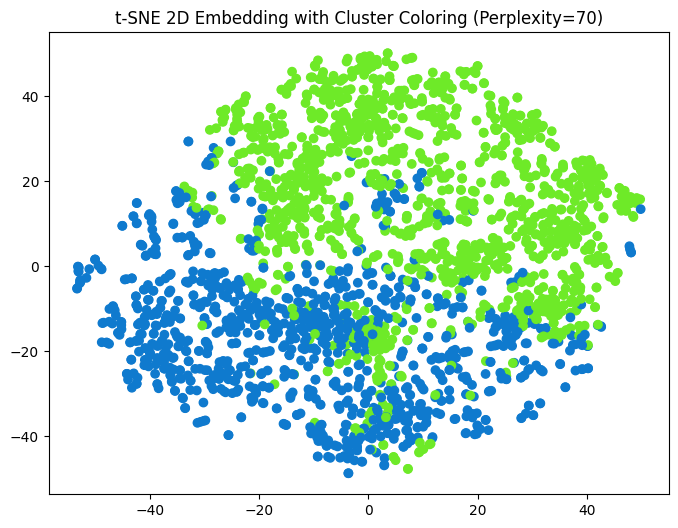

In [23]:
from active_learning_with_exact09 import visualize_and_return_indices
all_indices,_ = visualize_and_return_indices(X_embedded_2d, cluster_labels, embeddings_dict,
                                   x1=100,y1=100,x2=None,y2=None,selected_indices=None)

In [24]:
class_0_indices = np.where(cluster_labels == 0)[0]
class_1_indices = np.where(cluster_labels == 1)[0]
# class_2_indices = np.where(cluster_labels == 2)[0]
print(0 in cluster_labels[class_1_indices])
print(1 in cluster_labels[class_0_indices])
# print(1 in cluster_labels[class_2_indices])

False
False


filtered_indices 2441
selected_indices 1085
filtered_embeddings.shape (1085, 2)
filtered_indices 2441
selected_indices 1356
filtered_embeddings.shape (1356, 2)


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

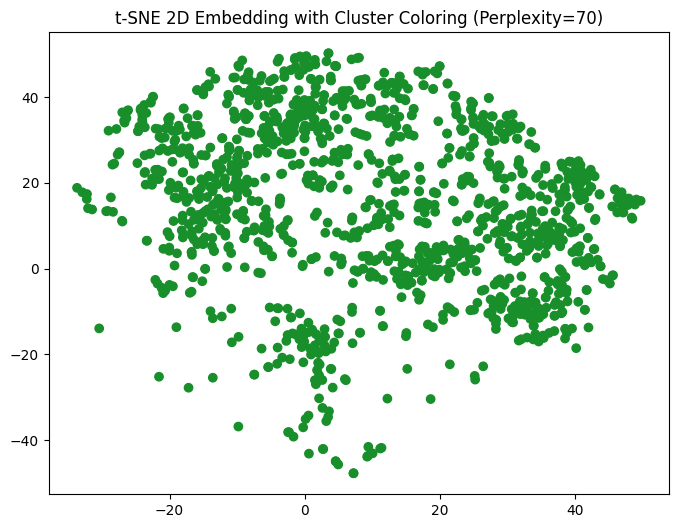

In [25]:
class_0_indices,class_0_names_filtered = visualize_and_return_indices(
    X_embedded_2d, cluster_labels, embeddings_dict,
    selected_indices=class_0_indices)
class_1_indices, class_1_names_filtered = visualize_and_return_indices(X_embedded_2d, 
                                                                        cluster_labels, embeddings_dict,
                                                                        x1=100,y1=100,x2=None,y2=None,selected_indices=class_1_indices)
# class_2_indices, class_2_names_filtered = visualize_and_return_indices(X_embedded_2d, 
#                                                                         cluster_labels, embeddings_dict,
#                                                                         x1=100,y1=100,x2=None,y2=None,selected_indices=class_2_indices)
# #可视化
#采样点的位置 平均聚类的位置


In [27]:
Precrop_dataset_for_train_path

'/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091'

In [28]:
subset_no_0304=raw_case_name_list
print(len(subset_no_0304))
print(len(all_indices))
num_all=len(subset_no_0304)
num_negtive=num_all-len(all_indices)


z=0.4

sam_total=round(z*num_all)
sam_num_negtive=round(sam_total*num_negtive/num_all)#从负例中抽样数量
sam_num_postive=sam_total-sam_num_negtive

sam_num_cluster0=round(0.2*sam_num_postive)
sam_num_cluster1=round(0.2*sam_num_postive)
sam_num_other=sam_num_postive-sam_num_cluster0-sam_num_cluster1



8832
2441


In [29]:
sam_num_cluster0,sam_num_cluster1,sam_num_other,sam_num_postive,sam_num_negtive,sam_total

(195, 195, 586, 976, 2557, 3533)

In [31]:
import random
sorted_indices = np.argsort(dis_all)[::-1]
select_samples=[]
postive_names=list(embeddings_dict.keys())
negtive_names=[]
for i in range(sam_num_other):
    select_samples.append(postive_names[sorted_indices[i]])


for i in raw_case_name_list:
    if i not in postive_names:
        negtive_names.append(i)

select_samples=select_samples+ random.sample(class_0_names_filtered, sam_num_cluster0)+random.sample(class_1_names_filtered, sam_num_cluster1)
select_samples=select_samples+ random.sample(negtive_names, sam_num_negtive)


In [32]:
len(select_samples)

3533

In [94]:
EXACT_img_niigz_path = "/mnt/wangc/EXACT09/EXACT09_3D/train"
EXACT_label_niigz_path = "/mnt/wangc/EXACT09/EXACT09_3D/train_label"
# LIDC_IDRI_img_niigz_path = "/data/Airway/LIDC-IDRI_3D/annotated_data/image"
# LIDC_IDRI_label_niigz_path = "/data/Airway/LIDC-IDRI_3D/annotated_data/label"

EXACT_names = os.listdir(EXACT_img_niigz_path)
EXACT_names.sort()
EXACT_label_names = os.listdir(EXACT_label_niigz_path)
EXACT_label_names.sort()
print(EXACT_names, EXACT_label_names)

# LIDC_names = os.listdir(LIDC_IDRI_img_niigz_path)
# LIDC_names.sort()
# LIDC_IDRI_label_names = os.listdir(LIDC_IDRI_label_niigz_path)
# LIDC_IDRI_label_names.sort()
# print(LIDC_names, LIDC_IDRI_label_names)

EXACT09_names = []
for EXACT09_name in EXACT_names:
    EXACT09_names.append("EXACT09_"+EXACT09_name.split(".")[0])
EXACT09_names = np.array(EXACT09_names)
EXACT09_names = np.unique(EXACT09_names)

# LIDC_IDRI_names = []
# for LIDC_IDRI_name in LIDC_names:
#     LIDC_IDRI_names.append("LIDC_IDRI_"+LIDC_IDRI_name.split(".")[0])
# LIDC_IDRI_names = np.array(LIDC_IDRI_names)
# LIDC_IDRI_names = np.unique(LIDC_IDRI_names)
names = np.concatenate((EXACT09_names, []))

# you can split train/test by yourself
# just show an example

test_names = [ 'EXACT09_CASE03',
        'EXACT09_CASE04',]
print("test name: "+str(test_names))
train_names = []
for name in names:
    if name not in test_names:
        train_names.append(name)
train_names=np.array(train_names)
print("train names: "+str(train_names))

['CASE01.nii.gz', 'CASE02.nii.gz', 'CASE03.nii.gz', 'CASE04.nii.gz', 'CASE05.nii.gz', 'CASE06.nii.gz', 'CASE07.nii.gz', 'CASE08.nii.gz', 'CASE09.nii.gz', 'CASE10.nii.gz', 'CASE11.nii.gz', 'CASE12.nii.gz', 'CASE13.nii.gz', 'CASE14.nii.gz', 'CASE15.nii.gz', 'CASE16.nii.gz', 'CASE17.nii.gz', 'CASE18.nii.gz', 'CASE19.nii.gz', 'CASE20.nii.gz'] ['CASE01_label.nii.gz', 'CASE02_label.nii.gz', 'CASE03_label.nii.gz', 'CASE04_label.nii.gz', 'CASE05_label.nii.gz', 'CASE06_label.nii.gz', 'CASE07_label.nii.gz', 'CASE08_label.nii.gz', 'CASE09_label.nii.gz', 'CASE10_label.nii.gz', 'CASE11_label.nii.gz', 'CASE12_label.nii.gz', 'CASE13_label.nii.gz', 'CASE14_label.nii.gz', 'CASE15_label.nii.gz', 'CASE16_label.nii.gz', 'CASE17_label.nii.gz', 'CASE18_label.nii.gz', 'CASE19_label.nii.gz', 'CASE20_label.nii.gz']
test name: ['EXACT09_CASE03', 'EXACT09_CASE04']
train names: ['EXACT09_CASE01' 'EXACT09_CASE02' 'EXACT09_CASE05' 'EXACT09_CASE06'
 'EXACT09_CASE07' 'EXACT09_CASE08' 'EXACT09_CASE09' 'EXACT09_CASE10'

In [95]:
#执行这个文件必须在python 3.8版本下
# To-do：None
import os
import numpy as np
import pickle
import edt

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
Precrop_dataset_for_train_path = "/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091"
Precrop_dataset_for_train_raw_path = Precrop_dataset_for_train_path+"/image"
Precrop_dataset_for_train_label_path = Precrop_dataset_for_train_path+"/label"

raw_case_name_list = os.listdir(Precrop_dataset_for_train_raw_path)
label_case_name_list = os.listdir(Precrop_dataset_for_train_label_path)

data_dict = dict()

for idx, name in enumerate(raw_case_name_list):
    print("process "+str(name)+" | "+str(idx/len(raw_case_name_list)), end="\r")
    data_dict[name.split(".")[0]]={}
    data_dict[name.split(".")[0]]["image"]=Precrop_dataset_for_train_raw_path+"/"+name
    data_dict[name.split(".")[0]]["label"]=Precrop_dataset_for_train_label_path+"/"+name

In [96]:
data_dict_select={}
data_dict
for name in select_samples:
    key = name[:-7]  # 提取前缀
    if key in data_dict:
        data_dict_select[key] = data_dict[key]


save_obj(data_dict_select, "/mnt/wangc/NaviAirway/dataset_info/al_select_40")

In [89]:
from active_learning_with_exact09 import generate_folder_for_selected
source_folder = '/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091'

target_folder = '/mnt/wangc/EXACT09/cluster_folder/init2_cluster/class0'
generate_folder_for_selected(source_folder, target_folder,class_0_names_filtered,250)
target_folder = '/mnt/wangc/EXACT09/cluster_folder/init2_cluster/class1'
generate_folder_for_selected(source_folder, target_folder,class_1_names_filtered,250)
# target_folder = '/mnt/share102/cs22-wangc/EXACT09/noml_Cluster/class2'
# generate_folder_for_selected(source_folder, target_folder,class_2_names_filtered)


KeyboardInterrupt: 

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import io
from matplotlib import gridspec
from active_learning_with_exact09 import show_all_2d_img_with_labels
def show_all_2d_img_with_labels(raw_img_path, output_folder, img_num=None, 
                                num_images_per_batch=16, slice_index=20, label_path=None,raw_img_list=None):
    if raw_img_list is None:
        raw_img_list = os.listdir(raw_img_path)
    if img_num is None:
        img_num = len(raw_img_list)
    img_num = min(img_num, len(raw_img_list))
    num_batches = (img_num + num_images_per_batch - 1) // num_images_per_batch  # 上取整

    num_rows = 4
    num_cols = 4
    
    # 检查并创建输出文件夹
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for batch_num in range(num_batches):
        start_index = batch_num * num_images_per_batch
        end_index = min((batch_num + 1) * num_images_per_batch, img_num)
        
        img_list = []
        label_list = []  # 新增：用于存储标签图像

        img_names=[]
        label_names=[]
        
        for i in range(start_index, end_index):
            raw_img_addr = os.path.join(raw_img_path, raw_img_list[i])
            raw_img = io.imread(raw_img_addr, plugin='simpleitk')
            img_list.append(raw_img)

            img_names.append(raw_img_list[i])
            
            if label_path is not None:
                label_img_list = os.listdir(label_path)
                label_img_addr = os.path.join(label_path, label_img_list[i])  # 使用相同的索引加载标签图像
                label_img = io.imread(label_img_addr, plugin='simpleitk')
                label_list.append(label_img)  # 存储标签图像

                label_names.append(label_img_list[i])
        
        # 创建一个包含16个子图的图像窗口，使用gridspec布局
        fig = plt.figure(figsize=(20, 20))
        gs = gridspec.GridSpec(num_rows, num_cols, figure=fig)
        fig.suptitle(f"Batch {batch_num+1} - Raw Images")
        for i in range(num_rows):
            for j in range(num_cols):
                index = i * num_cols + j
                if index < len(img_list):
                    raw_img = img_list[index]
                    ax = fig.add_subplot(gs[i, j])
                    if label_path is not None:
                        label_img = label_list[index]  # 使用相应索引的标签图像
                        if 1 not in label_img[slice_index, :, :]:
                            j=0
                            while(1 not in label_img[j, :, :]):
                                j+=1
                            ax.imshow(raw_img[j, :, :], cmap='gray')
                            ax.contour(label_img[j, :, :], colors='r', linestyles='-')
                        else:
                            ax.imshow(raw_img[slice_index, :, :], cmap='gray')
                            ax.contour(label_img[slice_index, :, :], colors='r', linestyles='-')
                    else:
                        ax.imshow(raw_img[slice_index, :, :], cmap='gray')
                    ax.set_title(f"Image {img_names[index]}\nLabel {label_names[index]} ")
                    ax.axis('off')
               

        # 调整子图之间的间距和布局
        plt.tight_layout()
        
        # 保存图像
        plt.savefig(os.path.join(output_folder, f"exact09_cluster_{batch_num+1}.png"))
        
        # 关闭图像窗口，避免重叠
        plt.close()


all_path='/mnt/wangc/EXACT09/cluster_folder/init2_cluster/'
sub_folders = [folder_name for folder_name in os.listdir(all_path) if os.path.isdir(os.path.join(all_path, folder_name))]

for path in sub_folders:
    address1 = ["/image", "/label"]
    raw_img_folder=all_path+'/'+path+address1[0]
    label_path= all_path+'/'+path+address1[1]
    print('this is ',path)
    slice_folder='/home/wangc/now/cluster_folder/init2_cluster_folder'+'/'+str(path)

    show_all_2d_img_with_labels(raw_img_folder,slice_folder,img_num=2000,label_path=label_path)



this is  class0
this is  class1


In [ ]:
from active_learning_with_exact09 import analysis_cluster
def analysis_cluster(label_path,raw_case_name_list=None,slice_index=None):
    def get_label_airway_pixels(label_img, slice_index=None):
        if slice_index is not None:
            if 1 not in label_img[slice_index, :, :]:
                j = 0
                while j < label_img.shape[0] and 1 not in label_img[j, :, :]:
                    j += 1
                if j >= label_img.shape[0]:
                    j = j - 1
                return label_img[j, :, :].sum()
            else:
                return label_img[slice_index, :, :].sum()
        else:
            return label_img.sum()
        

    if raw_case_name_list is None:
        label_img_list = os.listdir(label_path)
    else:
        label_img_list = raw_case_name_list
    pixels_num_list = []
    for name in label_img_list:
        label_img_addr = os.path.join(label_path, name)
        label_img = io.imread(label_img_addr, plugin='simpleitk')
        pixels_num = get_label_airway_pixels(label_img, slice_index)
        pixels_num_list.append(pixels_num)

    # 使用numpy计算均值和标准差
    mean_value = np.mean(pixels_num_list)
    std_deviation = np.std(pixels_num_list)
    num_sample=len(label_img_list)
    return mean_value, std_deviation,num_sample  # 均值和标准差

Precrop_dataset_for_train_path = "/mnt/wangc/EXACT09/Precrop_dataset_for_EXACT091"
Precrop_dataset_for_train_raw_path = Precrop_dataset_for_train_path+"/image"
Precrop_dataset_for_train_label_path = Precrop_dataset_for_train_path+"/label"
need_query=[query_list1,query_list2]
i=1


all_path = "/mnt/wangc/EXACT09/cluster_folder"
sub_folders = [folder_name for folder_name in os.listdir(all_path) if os.path.isdir(os.path.join(all_path, folder_name))]
for sub_name in sub_folders:
    class_num=['class0','class1']
    for i in class_num:
        end_path=all_path+'/'+sub_name+'/'+i+"/label"
        a,b,c=analysis_cluster(end_path,raw_case_name_list=None,slice_index=20)

        print(f"{sub_name} 's {i}     mean_value: {a}, std_deviation: {b}, num_sample: {c}")


need_query=[query_list1,query_list2]
i=0
for query_list in need_query:
    a,b,c=analysis_cluster(Precrop_dataset_for_train_label_path,query_list,20)
    print(f"init {i}     mean_value: {a}, std_deviation: {b}, num_sample: {c}")
    i+=1

cos_cluster 's class0     mean_value: 67.176, std_deviation: 126.05021627906872, num_sample: 250
cos_cluster 's class1     mean_value: 101.444, std_deviation: 196.8782742305509, num_sample: 250
euclidean_d 's class0     mean_value: 140.056, std_deviation: 230.5198231475983, num_sample: 250
euclidean_d 's class1     mean_value: 71.776, std_deviation: 126.82651861499627, num_sample: 250
kmeans_cluster 's class0     mean_value: 100.468, std_deviation: 194.454727317183, num_sample: 250
kmeans_cluster 's class1     mean_value: 91.9, std_deviation: 152.58729304892987, num_sample: 250
no_init_cluster 's class0     mean_value: 105.956, std_deviation: 156.55818747034598, num_sample: 250
no_init_cluster 's class1     mean_value: 88.72, std_deviation: 192.9940765930395, num_sample: 250
init2_cluster 's class0     mean_value: 88.72, std_deviation: 192.9940765930395, num_sample: 250
init2_cluster 's class1     mean_value: 105.956, std_deviation: 156.55818747034598, num_sample: 250
init 0     mean_v